In [11]:
import matplotlib.pyplot as plt
import geopandas as gpd
import os
import pandas as pd
import numpy as np
from PIL import Image


In [ ]:
DATA_PATH = '/home/leon/Documents/GPML/good_practices_ml/data/raw_data/compressed_dataset'
list_rows = []
for folder in os.listdir(DATA_PATH):
    for file in os.listdir(os.path.join(DATA_PATH,folder)):
        with Image.open(os.path.join(DATA_PATH,folder,file)) as img:
            width, hight = img.size
            form = img.format
            temp_dict={
                'label' : folder,
                'width' : width,
                'hight' : hight,
                'format' : form,
                'path' : os.path.join(DATA_PATH,folder,file)
            }
            list_rows.append(temp_dict)
df = pd.DataFrame(list_rows)
countries = df.label.unique().tolist()
label_counts = df['label'].value_counts()


label
United States             12014
Japan                      3840
France                     3573
United Kingdom             2484
Brazil                     2320
                          ...  
Mozambique                    1
Nepal                         1
Svalbard and Jan Mayen        1
Gibraltar                     1
Antarctica                    1
Name: count, Length: 124, dtype: int64


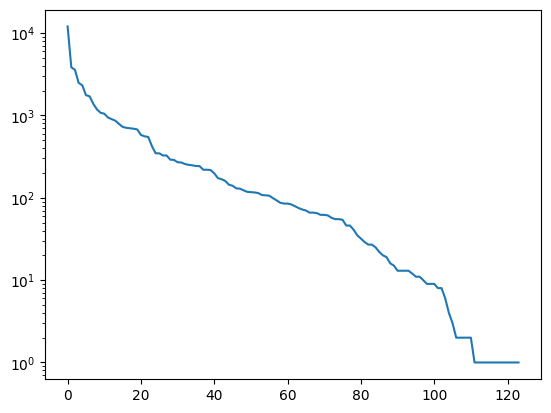

In [44]:
value_counts = df['label'].value_counts().reset_index()
print(label_counts)
plt.plot(label_counts.values)
plt.yscale('log')

In [15]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
matching=[]
missing=[]
for count in countries:
    if count in world['name'].values:
        matching.append(count)
    else:
        missing.append(count)
print(f'number of matching countries is {len(matching)} and from missing countries is {len(missing)}')
print(f'the missing coniutries are: {missing}')
        

number of matching countries is 97 and from missing countries is 27
the missing coniutries are: ['South Georgia and South Sandwich Islands', 'Andorra', 'Curacao', 'US Virgin Islands', 'Macao', 'Aland', 'Singapore', 'Hong Kong', 'Guam', 'Eswatini', 'Faroe Islands', 'Bermuda', 'Svalbard and Jan Mayen', 'Northern Mariana Islands', 'Jersey', 'American Samoa', 'South Sudan', 'Reunion', 'Malta', 'Isle of Man', 'Gibraltar', 'Martinique', 'United States', 'Monaco', 'Dominican Republic', 'San Marino', 'Pitcairn Islands']


/tmp/ipykernel_11364/3052404450.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [29]:
print(world[world['name'].str.contains('And')])
print(df[df['label'].str.contains('And')])


Empty GeoDataFrame
Columns: [pop_est, continent, name, iso_a3, gdp_md_est, geometry]
Index: []
        label  width  hight format  \
7550  Andorra   1536    662   JPEG   
7551  Andorra   1536    662   JPEG   
7552  Andorra   1536    662   JPEG   
7553  Andorra   1536    662   JPEG   
7554  Andorra   1536    662   JPEG   
7555  Andorra   1536    662   JPEG   
7556  Andorra   1536    662   JPEG   
7557  Andorra   1536    662   JPEG   
7558  Andorra   1536    662   JPEG   
7559  Andorra   1536    662   JPEG   
7560  Andorra   1536    662   JPEG   
7561  Andorra   1536    662   JPEG   
7562  Andorra   1536    662   JPEG   

                                                   path  
7550  /home/leon/Documents/GPML/good_practices_ml/da...  
7551  /home/leon/Documents/GPML/good_practices_ml/da...  
7552  /home/leon/Documents/GPML/good_practices_ml/da...  
7553  /home/leon/Documents/GPML/good_practices_ml/da...  
7554  /home/leon/Documents/GPML/good_practices_ml/da...  
7555  /home/leon/Documen

In [ ]:
countrynames={
    "United States" : "United States of America",
    "South Sudan" : "S. Sudan",
    "South Georgia and South Sandwich Islands" : "Georgia",
    
    
    
}

                    Country  Value
0             United States  12014
1                     Japan   3840
2                    France   3573
3            United Kingdom   2484
4                    Brazil   2320
..                      ...    ...
119              Mozambique      1
120                   Nepal      1
121  Svalbard and Jan Mayen      1
122               Gibraltar      1
123              Antarctica      1

[124 rows x 2 columns]


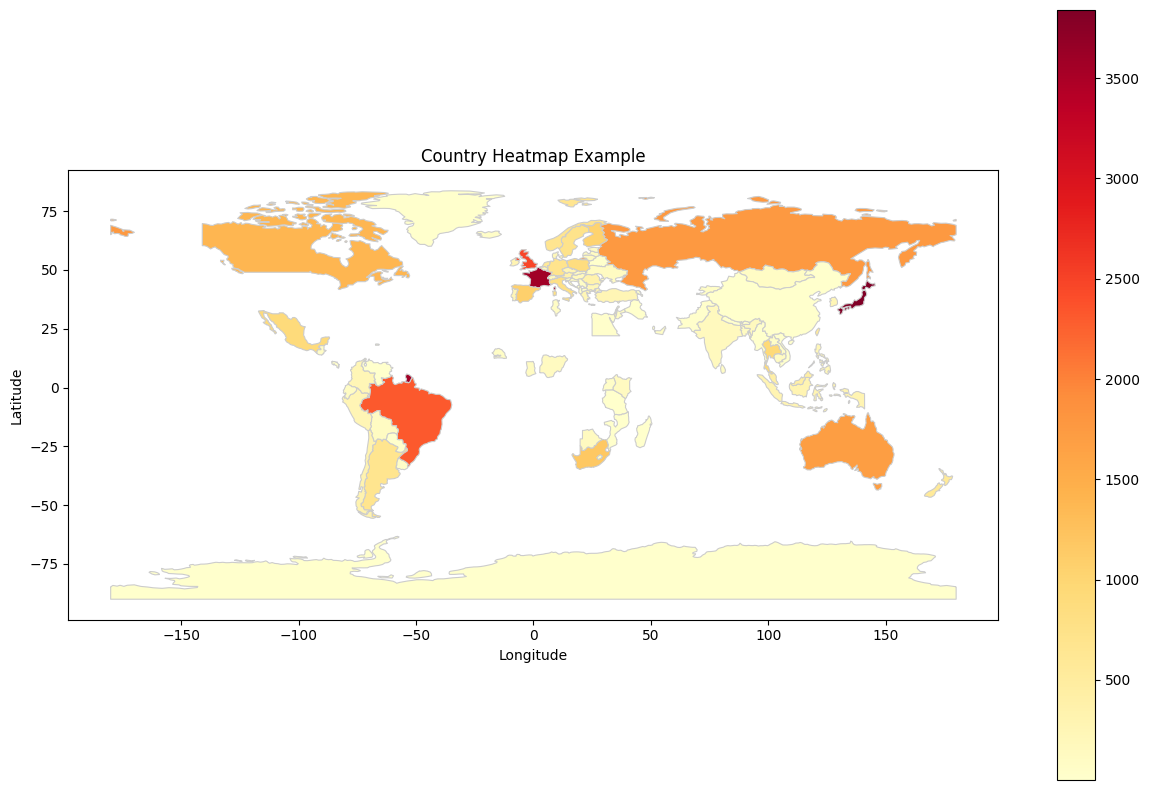

In [49]:
value_counts = df['label'].value_counts().reset_index()
value_counts.columns = ['Country', 'Value']
print(value_counts)
merged = world.merge(value_counts, how='left', left_on='name', right_on='Country')

# Plot the heatmap
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='Value', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add title and axis labels
plt.title('Country Heatmap Example')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()